# colab

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp -r /content/drive/MyDrive/IC\ CNC/cutting_tests_processed /content/
# path_df_processed = "/content/drive/MyDrive/IC CNC/cutting_tests_processed"

In [3]:
# ! cp /content/dados-chatter/timeSeries_3inchStickout/F_12-Jun-2017_rpm570_doc0p015.mat /content/

In [4]:
# ! rm -r split_cutting_tests_processed 

In [5]:
# creating new folders that will withhold the new dataframes created by spliting
# ! mkdir split_cutting_tests_processed 
# ! cd split_cutting_tests_processed 
# list_of_folders = listdir("cutting_tests_processed")
# for folder in list_of_folders:
#     list_of_files = listdir(f'cutting_tests_processed/{folder}')
#     ! mkdir split_cutting_tests_processed/{folder}

# libraries and data


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sc
import scipy.stats
from scipy.fft import fft, fftfreq
from scipy.fftpack import fft, ifft 
from os import listdir
import os.path
import shutil 
from sklearn import *
import sklearn
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC


In [7]:
success = True
while success == True:
    try:
        shutil.rmtree('split_cutting_tests_processed')
        success = False
    except:
        success = False

In [8]:
# creating directory using os
success = True
while success == True:
    try: 
        list_of_folders = listdir("cutting_tests_processed")
        for folder in list_of_folders:
            os.makedirs(f'split_cutting_tests_processed/{folder}')
        success = False
    except:
        success = False

https://realpython.com/python-scipy-fft/

https://docs.scipy.org/doc/scipy/tutorial/fft.html

In [9]:
# list_of_folders = listdir("cutting_tests_processed")
for folder in list_of_folders:
    list_of_files = listdir(f'cutting_tests_processed/{folder}')
    for file in list_of_files:
        if file[0] != 'u':
            ''' spliting each processed data into for new files
            saves them as files in the same organization logic as the original files
            files classified as unkown were not used
            '''
            data = sc.loadmat(f'cutting_tests_processed/{folder}/{file}')
            df = pd.DataFrame.from_dict(data['tsDS'][:,:])
            df.rename({0: 't', 1: 'y'}, axis=1, inplace=True)
            
            freq = np.fft.fftfreq(len(df['t']), df['t'][1] - df['t'][0])
            yf = np.fft.fft(df['y'])
            df['fft'] = yf
            df['fftfreq'] = freq # omega
            
            df_split = np.array_split(df,4)
            for split_num in np.arange(4):
                df_split[split_num] = df_split[split_num].reset_index(drop=True)
                print(df_split[split_num].head())
                df_split[split_num].to_csv(f'split_cutting_tests_processed/{folder}/{file[:-4]}_split_{split_num}.csv')

            print(df_split)

           t         y                   fft   fftfreq
0  14.999994  0.000091  953.952195+0.000000j  0.000000
1  15.000094 -0.002313  1.1815960-0.4163340j  0.057143
2  15.000194  0.004399 -0.1409340-0.8346570j  0.114285
3  15.000294 -0.016510  0.1592240-0.0156650j  0.171428
4  15.000394 -0.014385 -0.1734100+0.3800490j  0.228570
           t         y                 fft      fftfreq
0  19.375094  0.005360 -0.171846-1.292377j  2500.042857
1  19.375194  0.012066 -0.521701-0.412814j  2500.099999
2  19.375294 -0.004381 -1.043617-0.557953j  2500.157142
3  19.375394  0.002434  0.193620+0.569641j  2500.214284
4  19.375494  0.004849 -0.782812+0.291920j  2500.271427
           t         y                 fft      fftfreq
0  23.750094  0.016071  0.177077+0.419692j -4999.971429
1  23.750194 -0.011154 -0.056374-0.117604j -4999.914286
2  23.750294  0.018321  0.235997-0.258010j -4999.857144
3  23.750394 -0.001373  0.165713-0.234548j -4999.800001
4  23.750494 -0.000633  0.134389+0.047235j -4999.74285

In [10]:
# for folder in list_of_folders:
#     list_of_files = listdir(f'cutting_tests_processed/{folder}')
#     for file in list_of_files:
#         if file[0] != 'u':
#             data = sc.loadmat(f'cutting_tests_processed/{folder}/{file}')
#             df = pd.DataFrame.from_dict(data['tsDS'][:,:])
#             df.rename({0: 't', 1: 'y'}, axis=1, inplace=True)
            
#             freq = np.fft.fftfreq(len(df['t']), df['t'][1] - df['t'][0])
#             yf = np.fft.fft(df['y'])
            
#             # plt.figure()
#             # plt.title(f'{file}')
#             # plt.xlabel('f')
#             # plt.ylabel('A')
#             # plt.plot(freq,yf)
#             # plt.show()
#             df['fft'] = yf
#             df['fftfreq'] = freq # omega

In [11]:
# for folder in list_of_folders:
#     list_of_files = listdir(f'cutting_tests_processed/{folder}')
#     for file in list_of_files:
#         if file[0] != 'u':
#             data = sc.loadmat(f'cutting_tests_processed/{folder}/{file}')
#             df = pd.DataFrame.from_dict(data['tsDS'][:,:])
#             df.rename({0: 't', 1: 'y'}, axis=1, inplace=True)
            
#             plt.figure()
#             plt.title(f'{file}')
#             plt.xlabel('t')
#             plt.ylabel('y')
#             plt.plot(df['t'], df['y'])

# !!

In [12]:
list_of_folders = listdir("split_cutting_tests_processed")
cols = {'t': [],
        'y': [],
        'fft': [],
        'fftfreq': []} # dictionary to whom the data will be added to create a df
for folder in list_of_folders:
    list_of_files = listdir(f'split_cutting_tests_processed/{folder}')
    for file in list_of_files:
        # if file[0] != 'u':
        ''' Adding noise to all the split data files and saving it as a separate file.
            The only column to whom was added noise is the "y" column. The other one
            represents time, therefor cannot have added noise. 
            The files classified as "unknown" for the presence of chatter were not used 
            '''
        df = pd.read_csv(f'split_cutting_tests_processed/{folder}/{file}')
        df['y'] = df['y'].astype('float')
        df['t'] = df['t'].astype('float')

        mu, sigma = 0, np.sqrt(np.mean(df['y']**2))*0.1 # adding noise using rms
        noise = np.random.normal(mu, sigma, df['y'].shape)

        cols['y'] = df['y'] + noise
        cols['t'] = df['t']

        freq = np.fft.fftfreq(len(cols['t']), cols['t'][1] - cols['t'][0])
        yf = np.fft.fft(cols['y'])
        cols['fft'] = yf
        cols['fftfreq'] = freq # omega
        
        df_noise_added = pd.DataFrame(cols)
        df_noise_added.to_csv(f'split_cutting_tests_processed/{folder}/{file[:-4]}_noise_added.csv')


In [13]:
# list_of_folders = listdir("split_cutting_tests_processed")
# for folder in list_of_folders:
#     list_of_files = listdir(f'split_cutting_tests_processed/{folder}')
#     for file in list_of_files:
#             ''' ploting split data with and without noise
#             '''
#         # if 
#             df_no_noise = pd.read_csv(f'/content/split_cutting_tests_processed/{folder}/{file}')
#             plt.figure(figsize=(10.0,9.0))
#             plt.title(f'{file}')
#             plt.xlabel('Time')
#             plt.ylabel('y')
#             plt.plot(df_no_noise['t'], df_no_noise['y'])
#             plt.show()
#         # else:
#             df_noise_added = pd.read_csv(f'/content/split_cutting_tests_processed/{folder}/{file}')
#             plt.figure(figsize=(10.0,9.0))
#             plt.title(f'{file}')
#             plt.xlabel('Time')
#             plt.ylabel('y')
#             plt.plot(df_noise_added['t'], df_noise_added['y'], c='C1')
#             plt.show()

In [14]:
# # list_of_folders = listdir("split_cutting_tests_processed")
# # for folder in list_of_folders:

# list_of_files = listdir(f'split_cutting_tests_processed/2inch_stickout')
# for file in list_of_files:
#     ''' printing files with fft transformation
#     '''
#     file_ = pd.read_csv(f'split_cutting_tests_processed/2inch_stickout/{file}')
#     plt.figure(figsize=(10,9))
#     plt.title(f'{file}')
#     plt.xlabel('time')
#     plt.ylabel('FFT amplitude')
#     plt.plot(file_['t'],scipy.fftpack.fft(file_['y'].values))

the following cell finds the highest and second highest values of fft transformation for y column.
Since they are not saved in it, it was turned into a comment. 

In [15]:
# list_of_folders = listdir("split_cutting_tests_processed")
# for folder in list_of_folders:
#     list_of_files = listdir(f'split_cutting_tests_processed/{folder}')
#     for file in list_of_files:
#         ''' finding the highest and second highest frequencies
#         '''
#         file_ = pd.read_csv(f'split_cutting_tests_processed/2inch_stickout/{file}')
#         fft_ = scipy.fftpack.fft(file_['y'].values) 
#         max_fft_amplitude = fft_.max()
#         fft_amplitudes = sorted(np.array(fft_))
#         print(f'max: {max_fft_amplitude} \n second highest: {fft_amplitudes[-2]}')


In [16]:
df
# df_noise_added.shape # shape of the last split file saved

,Unnamed: 0,t,y,fft,fftfreq
0,0,12.500094,0.008880,(-1.7818995007755123-2.8613277482985113j),-2499.975000
1,1,12.500194,0.008015,(0.46461045584128674-2.656321871209217j),-2499.875001
2,2,12.500294,0.008893,(0.130346126067183-3.272295054133306j),-2499.775002
3,3,12.500394,0.009559,(0.01061373554142142-2.9741916043839907j),-2499.675003
4,4,12.500494,0.007452,(1.6772447994325506-1.2544377440902563j),-2499.575004
...,...,...,...,...,...
24995,24995,14.999594,0.009258,(0.011849397074497909+0.06813143521601821j),-0.499995
24996,24996,14.999694,0.005905,(-0.15946304843578904-0.34017648865128963j),-0.399996
24997,24997,14.999794,0.005560,(-0.25780273581203816-0.13285438562153382j),-0.299997
24998,24998,14.999894,0.009626,(-0.7752927082516672-0.18428433813366946j),-0.199998


# creating new df with math features


defining the function used in the creation of the dataframe as to keep the formulas more organized and easy to read. 

In [17]:
def thd(data_): # true harmonic distortion
    sq_sum = 0.0
    for r in range(len(data_)):
        sq_sum = sq_sum + data_[r]**2
    sq_harmonics = sq_sum - max(data_)**2
    return 100*sq_harmonics**0.5 / max(data_)

def rms(data_):
    return np.sqrt(np.mean(data_**2))

def amp(data_):
    return max(data_) - min(data_)

def SRA(data_):
    return np.mean(np.sqrt(np.abs(data_)))**2

def crest(data_):
    return max(np.abs(data_))/np.sqrt(np.mean(data_**2))

def impulse(data_):
    return max(np.abs(data_))/np.mean(abs(data_))

def margin(data_):
    return max(abs(data_))/np.mean(np.sqrt(np.abs(data_)))**2

def freq_max(data_):
    # sorted(np.array(scipy.fftpack.fft(file['y'].values)))[-2]
    # print(data_)
    print(data_['fftfreq'][data_['fft'] == data_['fft'].max()].values[0])

def freq_sec_highest(data_):
    # sorted(np.array(scipy.fftpack.fft(file['fftfreq'].values)))[-3]
    data_sorted = data_.sort_values(by = ['fft'], ascending = False)
    return data_sorted['fftfreq'][1]

def freq_mean(data_):
    return data_['fftfreq'].mean()

# def freq_pico(data_):
#     # sorted(np.array(scipy.fftpack.fft(file['y'].values)))[-2]
#     return data_['fftfreq'].max()

        # cols['freq_max'].append(scipy.fftpack.fft(file['y'].values).max()) # https://gist.github.com/endolith/255291
        # cols['freq_sec_highest'].append(sorted(np.array(scipy.fftpack.fft(file['y'].values)))[-2]) 
        # cols['freq_mean'].append(scipy.fftpack.fft(file['y'].values).mean()) 


fiquei em dúvida sobre se deixava o -2 como segundo maior ou o -3, pois caso fosse -2 estaríamos contando o ponto inicial como o maior, que é sempre o maior. Outlier?

In [18]:
cols = {'Experiment': [],
        'chatter_presence': [],
        'med': [],
        'std': [],
        'rms': [],
        'curtose': [],
        'distortion': [],
        'amplitude': [],
        'sra': [],
        'crest': [],
        'impulse': [],
        'margin': [],
        'max': [],
        'freq_max': [],
        'freq_sec_highest': [],
        'freq_mean': []}

for folder in list_of_folders:
    list_of_files = listdir(f'split_cutting_tests_processed/{folder}')
    for file in list_of_files:
        cols['Experiment'].append(f'{file[:-4]}')
        cols['chatter_presence'].append(f'{file[:1]}')
        
        print(file)
        file = pd.read_csv(f'split_cutting_tests_processed/{folder}/{file}', index_col=0)
        # freq = np.fft.fftfreq(len(file['t']), file['t'][1] - file['t'][0])
        # yf = np.fft.fft(file['y'])
        # file['fft'] = yf
        # file['fftfreq'] = freq # omega
        # print(file.columns)
        # print('0:', file[0])
        # print('1:', file[1])
        
        # print(file['Unnamed: 0'])
        # print(file.head())
                
        cols['med'].append(file['y'].mean())
        cols['std'].append(file['y'].std())
        cols['rms'].append(rms(file['y']))
        
        cols['curtose'].append(scipy.stats.kurtosis(file['y']))
        cols['distortion'].append(thd(file['y']))
        cols['amplitude'].append(amp(file['y']))
        cols['sra'].append(SRA(file['y']))
        
        cols['crest'].append(crest(file['y']))
        cols['impulse'].append(impulse(file['y']))
        cols['margin'].append(margin(file['y']))
        cols['max'].append(file['y'].max())
        
        cols['freq_max'].append(freq_max(file)) # https://gist.github.com/endolith/255291
        cols['freq_sec_highest'].append(freq_sec_highest(file)) 
        cols['freq_mean'].append(freq_mean(file))




c_320_005_split_0.csv
0.0
c_320_005_split_0_noise_added.csv
866.7230463323896
c_320_005_split_1.csv
4660.259084244665
c_320_005_split_1_noise_added.csv
898.2857142878078
c_320_005_split_2.csv
-4660.259084244665
c_320_005_split_2_noise_added.csv
466.9714285725169
c_320_005_split_3.csv
-1038.5083513832697
c_320_005_split_3_noise_added.csv
923.6571428592956
c_425_020_split_0.csv
715.185696287741
c_425_020_split_0_noise_added.csv
76.79385649302378
c_425_020_split_1.csv
3501.729965408853
c_425_020_split_1_noise_added.csv
-1781.6000000041522
c_425_020_split_2.csv
-3501.729965408853
c_425_020_split_2_noise_added.csv
120.00000000027968
c_425_020_split_3.csv
-715.185696287741
c_425_020_split_3_noise_added.csv
-120.00000000027968
c_425_025_split_0.csv
918.658500815467
c_425_025_split_0_noise_added.csv
863.2581952661802
c_425_025_split_1.csv
3886.365454538351
c_425_025_split_1_noise_added.csv
308.62222222294145
c_425_025_split_2.csv
-3886.365454538351
c_425_025_split_2_noise_added.csv
-966.044444

In [19]:
# print(cols)
dataframe = pd.DataFrame(cols)
dataframe

,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,freq_mean
0,c_320_005_split_0,c,0.005467,0.012138,0.013313,2.634906,3650.771186,0.139882,0.008110,5.727255,7.709960,9.401634,0.076245,None,0.057143,1.249993e+03
1,c_320_005_split_0_noise_added,c,0.005473,0.012203,0.013374,2.549456,3736.695416,0.138149,0.008151,5.595654,7.523921,9.180502,0.074834,None,0.228566,-4.789549e-14
2,c_320_005_split_1,c,0.005441,0.012047,0.013219,2.960989,3338.362540,0.149052,0.007937,6.262688,8.537180,10.430287,0.082784,None,2500.099999,3.750007e+03
3,c_320_005_split_1_noise_added,c,0.005443,0.012118,0.013284,2.885734,3375.542862,0.147705,0.007965,6.193768,8.439460,10.329666,0.082278,None,0.228571,-1.142857e-01
4,c_320_005_split_2,c,0.005445,0.007912,0.009605,6.494952,3234.424531,0.116349,0.006290,6.463750,8.482305,9.870098,0.062082,None,-4999.914286,-3.750007e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,s_770_020_split_1_noise_added,s,0.005444,0.003072,0.006251,0.073742,4691.138489,0.029387,0.005069,3.369714,3.801865,4.154979,0.021062,None,0.400000,-2.000000e-01
724,s_770_020_split_2,s,0.005479,0.002920,0.006209,-0.147705,5759.337814,0.026171,0.005117,2.744935,3.069301,3.330660,0.017042,None,-4999.850002,-3.750012e+03
725,s_770_020_split_2_noise_added,s,0.005482,0.002988,0.006243,-0.118512,5556.337152,0.028638,0.005111,2.845189,3.192067,3.475668,0.017764,None,0.400000,-2.000000e-01
726,s_770_020_split_3,s,0.005495,0.003600,0.006569,0.110267,4197.403771,0.034502,0.005125,3.765876,4.340221,4.826882,0.024739,None,-2499.875001,-1.250037e+03


tabela

análise de cluster *

fórmulas 

u como teste e case

i: describe, análise automatizada? (fft/n), 

eda

encontrar forma mais otimizada de fazer os loops, estão levando minutos

C:\Users\Windows\AppData\Local\Temp/ipykernel_12720/3638022587.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr(method="pearson")
C:\Users\Windows\AppData\Local\Temp/ipykernel_12720/3638022587.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), annot=True, fmt=".2f", cmap='Purples')


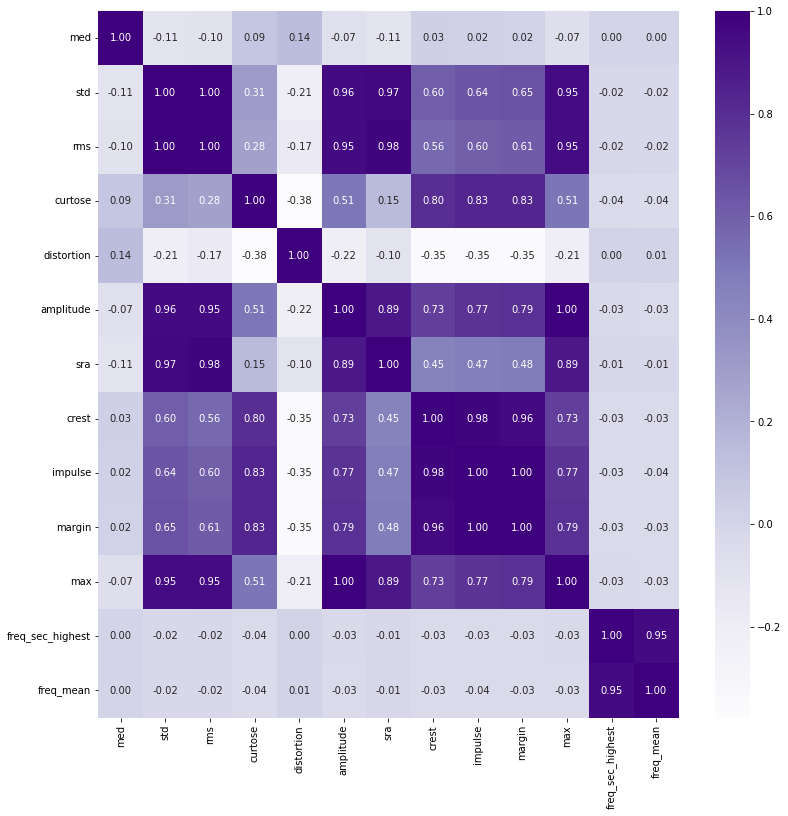

In [20]:
dataframe.corr(method="pearson")

plt.figure(figsize=(13,13))
sns.heatmap(dataframe.corr(), annot=True, fmt=".2f", cmap='Purples')
plt.show()

Os experimentos apresentaram médias de frequências quase iguais(?)

<AxesSubplot:xlabel='chatter_presence', ylabel='freq_sec_highest'>

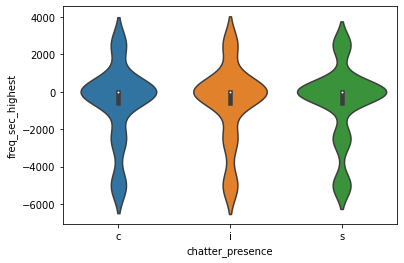

In [21]:
sns.violinplot(data=dataframe, x='chatter_presence', y='freq_sec_highest')

# models

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

from sklearn.model_selection import GridSearchCV

In [23]:
lreg = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

In [24]:
dataframe = pd.get_dummies(dataframe, columns=['chatter_presence'], drop_first=True)
dataframe.head(1)


,Experiment,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,freq_mean,chatter_presence_i,chatter_presence_s
0,c_320_005_split_0,0.005467,0.012138,0.013313,2.634906,3650.771186,0.139882,0.00811,5.727255,7.70996,9.401634,0.076245,None,0.057143,1249.992857,0,0


In [25]:
dataframe["chatter_presence_s"] = dataframe["chatter_presence_s"].astype('bool')
dataframe["chatter_presence_i"] = dataframe["chatter_presence_i"].astype('bool')
dataframe.dtypes

Experiment             object
med                   float64
std                   float64
rms                   float64
curtose               float64
distortion            float64
amplitude             float64
sra                   float64
crest                 float64
impulse               float64
margin                float64
max                   float64
freq_max               object
freq_sec_highest      float64
freq_mean             float64
chatter_presence_i       bool
chatter_presence_s       bool
dtype: object

In [26]:
y = dataframe['chatter_presence_s']
x = dataframe.copy().drop(['Experiment', 'chatter_presence_s', 'freq_max'], axis="columns", inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

## Linear

In [27]:
lreg.fit(x_train, y_train)

LinearRegression()

In [28]:
lreg_pred = lreg.predict(x_test)

In [29]:
r2_score(y_test, lreg_pred)

0.7321089692471577

In [30]:
mean_absolute_error(y_test, lreg_pred)

0.17224122598523814

## Random Forest

In [31]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
rf_pred = rf.predict(x_test)

In [33]:
r2_score(y_test, rf_pred)

0.8444580056980057

In [34]:
mean_absolute_error(y_test, rf_pred)

0.06746575342465755

## Decision Tree


In [35]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [36]:
dt_pred = dt.predict(x_test)

In [37]:
r2_score(y_test, dt_pred)

0.8058879392212726

In [38]:
mean_absolute_error(y_test, dt_pred)

0.04794520547945205

In [39]:
params = {
    'criterion': ['mse', 'poisson', 'mae'],
    'max_depth': [3,5,8,15]
}

In [40]:
dt = GridSearchCV(DecisionTreeRegressor(), params, cv=5)
dt.get_params().keys()
dt.fit(x_train, y_train)
dt.best_estimator_ # criterion='mse', max_depth=5


c:\Users\Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion

DecisionTreeRegressor(criterion='mse', max_depth=5)

In [41]:
dt.best_estimator_.fit(x_train, y_train)

c:\Users\Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=5)

In [42]:
dt_pred = dt.predict(x_test)

In [43]:
r2_score(y_test, dt_pred)

0.8056895482985481

In [44]:
mean_absolute_error(y_test, dt_pred)

0.05062386365213527

## SVM


In [45]:
classifier_linear = SVC(kernel = 'linear', random_state = 0)
classifier_linear.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [46]:
svm_linear_pred = classifier_linear.predict(x_test)

In [49]:
accuracy_score(y_test, svm_linear_pred)

0.9041095890410958

In [50]:
classifier_rbf = SVC(kernel = 'rbf', random_state = 0)

In [54]:
accuracy_score(y_test, svm_linear_pred)

0.9041095890410958